<H3>Data Input<H3>

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

%matplotlib inline

In [102]:
# Data Cleaning
file_path = "C:/Users/Srnzzz/Documents/GitHub/vanguard-ab-test/client_old_new_df.csv"
df = pd.read_csv(file_path)
df['date_time'] = pd.to_datetime(df['date_time'])
df_clean = df.dropna()

In [103]:
# Data Sorting
df_clean = df_clean.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])

# Calculate the time difference between each step within each visit
df_clean['duration'] = df_clean.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].diff().dt.total_seconds().abs()

In [104]:
# Average Step Duration per Client
avg_step_duration_clients = df_clean.groupby('client_id')['duration'].mean().reset_index()

In [105]:
# Average Step Duration Total
avg_step_duration_total = df_clean.groupby('process_step')['duration'].mean().reset_index()

In [106]:
df_test = df_clean[df_clean['Variation'] == 'Test']
avg_step_duration_mean_test = df_test.groupby('process_step')['duration'].mean().reset_index().rename(columns={'duration': 'mean_duration'})
print(avg_step_duration_mean_test)
avg_step_duration_median_test = df_test.groupby('process_step')['duration'].median().reset_index().rename(columns={'duration': 'median_duration'})
print(avg_step_duration_median_test)
avg_step_duration_max_test = df_test.groupby('process_step')['duration'].max().reset_index().rename(columns={'duration': 'max_duration'})
#print(avg_step_duration_max_test)
avg_step_duration_min_test = df_test.groupby('process_step')['duration'].min().reset_index().rename(columns={'duration': 'min_duration'})
#print(avg_step_duration_min_test)
df_test.shape
df_test['Variation'].unique()

  process_step  mean_duration
0      confirm     128.769658
1        start     147.140325
2       step_1      37.704369
3       step_2      48.131611
4       step_3      96.850972
  process_step  median_duration
0      confirm             56.0
1        start             55.0
2       step_1             11.0
3       step_2             25.0
4       step_3             66.0


array(['Test'], dtype=object)

In [107]:
combined_avg_duration_test = avg_step_duration_mean_test \
    .merge(avg_step_duration_median_test, on='process_step') \
    .merge(avg_step_duration_max_test, on='process_step') \
    .merge(avg_step_duration_min_test, on='process_step')

# Display the final combined table
pd.DataFrame(combined_avg_duration_test)

,process_step,mean_duration,median_duration,max_duration,min_duration
0,confirm,128.769658,56.0,14581.0,0.0
1,start,147.140325,55.0,24819.0,0.0
2,step_1,37.704369,11.0,3636.0,0.0
3,step_2,48.131611,25.0,1858.0,0.0
4,step_3,96.850972,66.0,1923.0,0.0


In [108]:
df_no_test = df_clean[df_clean['Variation'] != 'Test']
avg_step_duration_mean_no_test = df_no_test.groupby('process_step')['duration'].mean().reset_index().rename(columns={'duration': 'mean_duration'})
print(avg_step_duration_mean_no_test)
avg_step_duration_median_no_test = df_no_test.groupby('process_step')['duration'].median().reset_index().rename(columns={'duration': 'median_duration'})
print(avg_step_duration_median_no_test)
avg_step_duration_max_no_test = df_no_test.groupby('process_step')['duration'].max().reset_index().rename(columns={'duration': 'max_duration'})
#print(avg_step_duration_max_no_test)
avg_step_duration_min_no_test = df_no_test.groupby('process_step')['duration'].min().reset_index().rename(columns={'duration': 'min_duration'})
#print(avg_step_duration_min_no_test)
df_no_test.shape
df_no_test['Variation'].unique()

  process_step  mean_duration
0      confirm     128.664715
1        start     151.366026
2       step_1      42.998741
3       step_2      38.667857
4       step_3      92.944258
  process_step  median_duration
0      confirm             73.0
1        start             37.0
2       step_1             18.0
3       step_2             20.0
4       step_3             66.0


array(['Control'], dtype=object)

In [109]:
combined_avg_duration = avg_step_duration_mean_no_test \
    .merge(avg_step_duration_median_no_test, on='process_step') \
    .merge(avg_step_duration_max_no_test, on='process_step') \
    .merge(avg_step_duration_min_no_test, on='process_step')

# Display the final combined table
pd.DataFrame(combined_avg_duration)


,process_step,mean_duration,median_duration,max_duration,min_duration
0,confirm,128.664715,73.0,9396.0,0.0
1,start,151.366026,37.0,40235.0,0.0
2,step_1,42.998741,18.0,4150.0,0.0
3,step_2,38.667857,20.0,1724.0,0.0
4,step_3,92.944258,66.0,3635.0,0.0


In [38]:
combined_avg_duration.to_excel('combined_avg_duration.xlsx', index=False)

<H3>First Test Statistic (Z-Score)<H3>


In [110]:
# Step Average
confirm_steps = df_test[df_test['process_step'] == 'confirm']
average_duration_confirm = confirm_steps['duration'].mean()

# Mean for Test_Step_Confirm
mean = 128.769658
mu = 100 # lower bc median is at 56.0
s = average_duration_confirm.std(ddof=1)
n = len(confirm_steps)
stat = (mean - mu)/(s/np.sqrt(n))
stat
confirm_steps["duration"].shape


C:\Users\Srnzzz\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Srnzzz\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(25722,)

In [111]:
# Step Average
confirm_steps = df_test[df_test['process_step'] == 'confirm']
average_duration_confirm = confirm_steps['duration'].mean()
average_duration_confirm
len(confirm_steps)

25722

<H3>Checking for Normal Distribution<H3>

In [112]:
# Plotting histogram for 'XXX'
sns.histplot(df_clean['XXX'], kde=True, bins=30, color="salmon")

KeyError: 'XXX'

In [ ]:
# Q-Q plot for 'SalePrice'
from scipy import stats

stats.probplot(df['SalePrice'], plot=plt)

In [ ]:
# Conducting the Kolmogorov-Smirnov test for normality on 'SalePrice'
# First, we need to standardize the data to have mean 0 and variance 1 since we're comparing against a standard normal distribution
standardized_saleprice = (df['SalePrice'] - df['SalePrice'].mean()) / df['SalePrice'].std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_saleprice, 'norm')

ks_test_statistic, ks_p_value

In [ ]:
# Applying Square Root transformation to '1stFlrSF'
df_no_test['duration_sqrt'] = np.sqrt(df_no_test['duration'])

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Square Root transformed '1stFlrSF'
sns.histplot(df_no_test['duration_sqrt'], kde=True)
plt.title('Square Root Transformed 1stFlrSF')

<H3>Determine P-Value<H3


In [148]:
# ttest for average duration
#H0: test_step_confirm <= control_step_confirm
#H1: test_step_confirm > control_step_confirm
df_test_clean = df_test.dropna()
df_no_test_clean = df_no_test.dropna()

test_step_start = df_test_clean[df_test_clean['process_step'] == "step_3"]["duration"]

control_step_confirm_start = df_no_test_clean[df_no_test_clean['process_step'] == "step_3"]["duration"]

st.ttest_ind(test_step_start,control_step_confirm_start, alternative="less") 

TtestResult(statistic=3.5529740149640765, pvalue=0.9998093673114898, df=48246.0)

In [143]:
df_process_steps_test = pd.DataFrame({
    'start': test_step_start.reset_index(drop=True),   # Resetting index to align the data
    'step_1': test_step_step_1.reset_index(drop=True),
    'step_2': test_step_step_2.reset_index(drop=True),
    'step_3': test_step_step_3.reset_index(drop=True),
    'confirm': test_step_confirm.reset_index(drop=True)
})
df_process_steps_test
df_process_steps_test.to_excel('process_steps_test.xlsx', index=False)

In [139]:
df_control_process_steps = pd.DataFrame({
    'start': control_step_confirm_start.reset_index(drop=True),   # Resetting index to align the data
    'step_1': control_step_confirm_step_1.reset_index(drop=True),
    'step_2': control_step_confirm_step_2.reset_index(drop=True),
    'step_3': control_step_confirm_step_3.reset_index(drop=True),
    'confirm': control_step_confirm_confirm.reset_index(drop=True)
})
df_control_process_steps
df_control_process_steps.to_excel('demographics.xlsx', index=False)

In [141]:
df_control_process_steps.to_excel('process_steps_control.xlsx', index=False)

<Axes: xlabel='duration', ylabel='Count'>

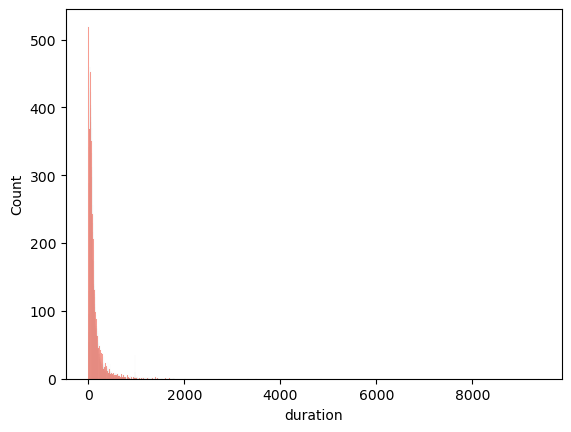

In [132]:
# Plotting histogram for 'XXX'
sns.histplot(control_step_confirm, kde=False, bins=3100, color="salmon")

C:\Users\Srnzzz\AppData\Local\Temp\ipykernel_16800\718204617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_step_confirm['duration_sqrt'] = np.sqrt(control_step_confirm)


Text(0.5, 1.0, 'Square Root Transformed Step 3 to Confirm Duration for Control')

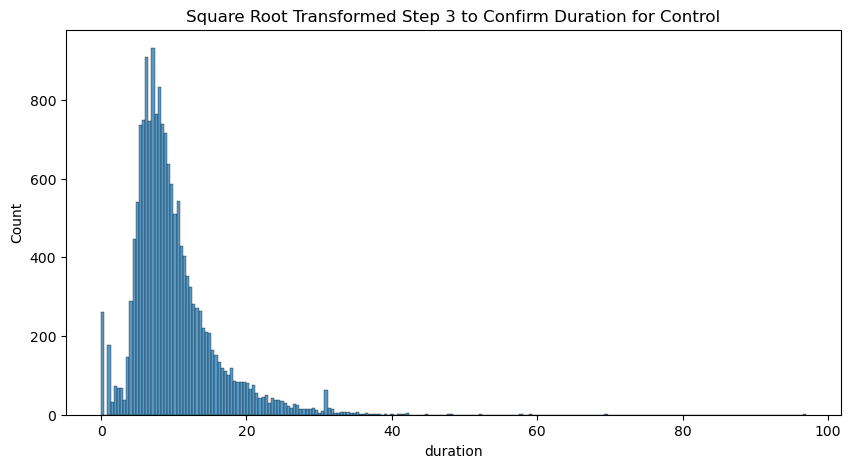

In [133]:
# Applying Square Root transformation to '1stFlrSF'
control_step_confirm['duration_sqrt'] = np.sqrt(control_step_confirm)

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Square Root transformed '1stFlrSF'
sns.histplot(control_step_confirm['duration_sqrt'], kde=False)
plt.title('Square Root Transformed Step 3 to Confirm Duration for Control')